In [1]:
%matplotlib inline

In [28]:
#%reset
import os
rundir='/space/hall3/sitestore/eccc/crd/ccrn/users/rms101/SCRIPTS/cfc/'
os.chdir(rundir)
import sys
sys.path.append('../PMODS')

import csv
import rms_plots as rpl
import matplotlib.pyplot as plt # for basic plotting
import numpy as np
plt.style.use('rms_paper')

1a. Calculate GM annual mean TAS timeseries LE
#####################################################

In [14]:
#####################general file
years=[]
co2=[]
aer1=[]
aer2=[]
o3t_old=[]
o3s_old=[]
aerrad=[]
aercloud=[]
total=[]

with open('DATA/ERF_ssp585_1750-2500.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    line_count=0
    for row in lines:
        if line_count==0:
            titles=row
        elif line_count>205 and line_count<257:
            years.append(int(row[0]))
            co2.append(float(row[1]))
            o3t_old.append(float(row[5]))
            o3s_old.append(float(row[6])) 
            aerrad.append(float(row[9])) 
            aercloud.append(float(row[10])) 
            total.append(float(row[17]))
        line_count+=1    

    print titles[1],titles[5],titles[6],titles[9],titles[10],titles[17]
co2=np.array(co2);co2=co2-co2[0]

o3t_old=np.array(o3t_old);o3t_old=o3t_old-o3t_old[0]
o3s_old=np.array(o3s_old);o3s_old=o3s_old-o3s_old[0]

aerrad=np.array(aerrad);aerrad=aerrad-aerrad[0]
aercloud=np.array(aercloud);aercloud=aercloud-aercloud[0]

total=np.array(total);total=total-total[0]


co2 o3_tropospheric o3_stratospheric aerosol-radiation_interactions aerosol-cloud_interactions total


In [16]:
#####################o3 file
years2=[]
o3t=[]
o3s=[]
with open('DATA/o3_erf.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    line_count=0
    for row in lines:
        if line_count==0:
            titles2=row
        elif line_count>205 and line_count<257:
            years2.append(int(row[0]))
            o3t.append(float(row[2]))
            o3s.append(float(row[3]))
        line_count+=1    

print titles2[2],titles2[3]
o3t=np.array(o3t);o3t=o3t-o3t[0]
o3s=np.array(o3s);o3s=o3s-o3s[0]

o3_trop o3_strat


In [17]:
#####################ODS file
years3=[]
ods=[]
with open('DATA/AR6_ERF_minorGHGs_1750-2019.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    line_count=0
    for row in lines:
        if line_count==0:
            titles3=row
        elif line_count>205 and line_count<257:
            years3.append(int(row[0]))
            ods.append(float(row[50]))
        line_count+=1    
print titles3[50]


ODS_total


0.36192628
1.0571975697284577
0.3423449791820474


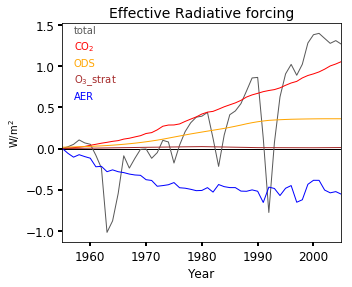

In [30]:
############### Setup fig
fig1, axs = plt.subplots(1,1, figsize=(5,8)); 
fig1.subplots_adjust(bottom=0.5,hspace=0.1,wspace=0.15)

############### global mean
ax=axs

ax.set_xlim([1955, 2005]) 
ax.set_xlabel('Year',size='large')
ax.axhline(y=0,color="black",linewidth=1)
#ax.set_ylim([-0.2, 1.3]) 
ax.set_ylabel('W/m$^2$')

##all forcing
kwargs={'linewidth': 1, 'color': [0.35,0.35,0.35]}
ax.plot(years,total,**kwargs)
kwargs={'linewidth': 1, 'color': 'red'}
ax.plot(years,co2,**kwargs)
kwargs={'linewidth': 1, 'color': 'orange'}
ax.plot(years,ods,**kwargs)
kwargs={'linewidth': 1, 'color': 'blue'}
ax.plot(years,aerrad+aercloud,**kwargs)

kwargs={'linewidth': 1, 'color': 'brown'}
ax.plot(years,o3s,**kwargs)

ax.text(1957,1.4,'total',color=[0.35,0.35,0.35])
ax.text(1957,1.2,'CO$_2$',color='red')
ax.text(1957,1.0,'ODS',color='orange')
ax.text(1957,0.8,'O$_3$_strat',color='brown')
ax.text(1957,0.6,'AER',color='blue')

##title and legend
rpl.add_title(ax,'Effective Radiative forcing')

##title and legend
rpl.mysavefig(fig1,'PLOTS/CFC_ERF_CMIP6.png')


print ods[-1]
print co2[-1]
print ods[-1]/co2[-1]



